POLYNOMIAL REGRESSION

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df= pd.read_csv(r"C:\Users\Shreelakshmi G Bhat\Downloads\working (2)\working\Supervised and Unsupervised learning\supervised\regression\Ice_cream selling data.csv")

In [7]:
df.shape

(49, 2)

In [10]:
X=df.iloc[:,0]
y_train=df.iloc[:40,1]
y_test=df.iloc[40:,1]
rows=X.shape[0]
count=0
N_TRAIN=40
train_err = {}
test_err = {}

In [11]:
def rmse(targets, predictions):
    return np.sqrt((np.square(predictions - targets)).mean())

In [15]:
for i in range(1, 6):
    degree = 3 * i
    A = np.ones((rows, degree + 1))  # +1 for bias term

    # Fill A with powers of X
    for k in range(1, degree + 1):
        A[:, k - 1] = np.power(X, k)

    # Bias term (last column already ones)
    A[:, -1] = 1

    # Split A into train and test sets
    x_train = A[:N_TRAIN, :]
    x_test = A[N_TRAIN:, :]

    # Train model using closed-form solution (normal equation)
    w = np.linalg.inv(x_train.T @ x_train) @ x_train.T @ y_train

    # Predictions
    y_train_pred = x_train @ w
    y_test_pred = x_test @ w

    # Errors
    rms_train = rmse(y_train, y_train_pred)
    rms_test = rmse(y_test, y_test_pred)

    # Store results
    train_err[degree] = rms_train
    test_err[degree] = rms_test

    # Print
    print(f"Degree {degree}: Train RMSE = {rms_train:.4f}, Test RMSE = {rms_test:.4f}")


Degree 3: Train RMSE = 2.2980, Test RMSE = 8.6540
Degree 6: Train RMSE = 2.0996, Test RMSE = 7.4777
Degree 9: Train RMSE = 1.9287, Test RMSE = 86.3729
Degree 12: Train RMSE = 1.8523, Test RMSE = 6150.4861
Degree 15: Train RMSE = 1.7029, Test RMSE = 200407.2501


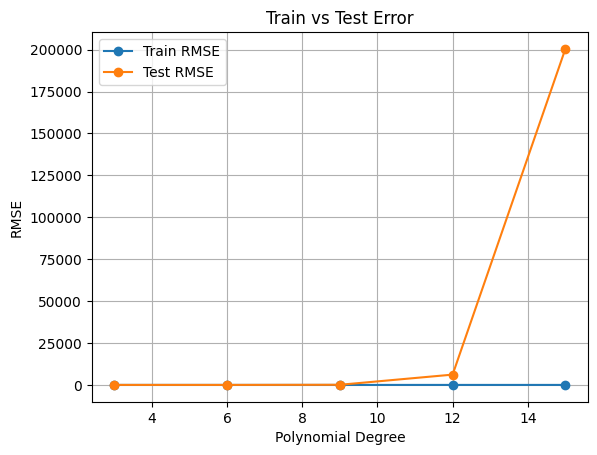

In [ ]:
import matplotlib.pyplot as plt
degrees = list(train_err.keys())
train_vals = list(train_err.values())
test_vals = list(test_err.values())
plt.plot(degrees, train_vals, marker='o', label='Train RMSE')
plt.plot(degrees, test_vals, marker='o', label='Test RMSE')
plt.xlabel('Polynomial Degree')
plt.ylabel('RMSE')
plt.title('Train vs Test Error')
plt.legend()
plt.grid(True)
plt.show()
